<a href="https://colab.research.google.com/github/hackrahul001/untitled/blob/master/stcokMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# data = pd.read_csv("/content/gdrive/MyDrive/yfinance/data.csv")

In [ ]:
data = pd.read_csv('https://www1.nseindia.com/content/indices/ind_nifty500list.csv')

In [ ]:
len(data)

501

In [ ]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 7.6 MB/s eta 0:00:00


In [ ]:
import yfinance as yf 

In [ ]:
import time
downloaded = []
symbols = []
for i in range(len(data)):
  try:
    downloaded.append(yf.download(data["Symbol"][i]+".NS",period="500d",interval="1d"))
    symbols.append(data["Symbol"][i])
  except:
    pass

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
len(downloaded)

501

In [ ]:
def scan(df):
  increasing = 1
  candle = "green"
  nexDayBuy = 0
  stopLoss = 0
  buy = 0
  target = 0
  alreadyBuy = 0
  nearMA44 = 0; 
  df = df
  df["MA44"] = df["Close"].rolling(44).mean()
  df = df.dropna()
  dates  = [ind for ind in df.index]
  dates = dates[-21:]
  for i in range(len(dates)-1):
    if( i != (len(dates)-1)):
      if(df["MA44"][dates[i+1]] >= df["MA44"][dates[i]]):
        increasing = increasing * 1
      else:
        increasing = increasing * 0
    else:
      if(df["MA44"][dates[i+1]] > df["MA44"][dates[i]] and df["MA44"][dates[i+1]] > df["MA44"][dates[0]] ):
        increasing = increasing * 1
      else:
       increasing = increasing * 0
  # print(len(df),len(dates))
  candleValueOC = df["Close"][dates[len(dates)-1]] -  df["Open"][dates[len(dates)-1]] 
  candleValueLH = df["High"][dates[len(dates)-1]] -  df["Low"][dates[len(dates)-1]]
  buy = round(df["High"][dates[len(dates)-1]]*100.5,2)
  stopLoss = round(df["Low"][dates[len(dates)-1]]*99.5,2)
  target = round((buy-stopLoss)*2+buy,2)
  lastCandlesizeValid =  1 if df["High"][dates[len(dates)-1]] <= df["MA44"][dates[len(dates)-1]]*1.03 else 0
  if(candleValueOC < 0):
    candle = "red"
  lastLow = df["Low"][dates[len(dates)-1]]
  lastMA44 = df["MA44"][dates[len(dates)-1]]
  # near MA44
  if(lastLow < lastMA44*1.03):
    nearMA44 = 1
  greenClosing = df["Close"][dates[len(dates)-1]]
  MA44 = df["MA44"][dates[len(dates)-1]]
  if(candle == "green" and (greenClosing > MA44) and increasing == 1 and nearMA44 == 1 and alreadyBuy != 1):
    nexDayBuy = 1
  return [nexDayBuy,buy,stopLoss,target]




In [ ]:
len(downloaded)

501

In [ ]:
stocks = []
for i in range(len(downloaded)):
  if(len(downloaded[i]) > 0):
    s = scan(downloaded[i])
    if(s[0] == 1):
      stocks.append([i,symbols[i],s[1],s[2],s[3]])

 

In [ ]:
 #nextDayBuy stocks if price goes above the last green candle #margin 0.05%
stocks

[[230, 'IOC', 8085.22, 7910.25, 8435.16],
 [248, 'JBMA', 55264.95, 48332.12, 69130.61],
 [286, 'LINDEINDIA', 346122.0, 330653.42, 377059.16],
 [421, 'SUNDRMFAST', 101002.5, 97674.18, 107659.14]]

In [ ]:
result = pd.DataFrame(stocks,columns =['Index','Name','Buy','Stop Loss','Target'])

In [ ]:
result

,Index,Name,Buy,Stop Loss,Target
0,230,IOC,8085.22,7910.25,8435.16
1,248,JBMA,55264.95,48332.12,69130.61
2,286,LINDEINDIA,346122.00,330653.42,377059.16
3,421,SUNDRMFAST,101002.50,97674.18,107659.14


In [ ]:
import mplfinance as mpf

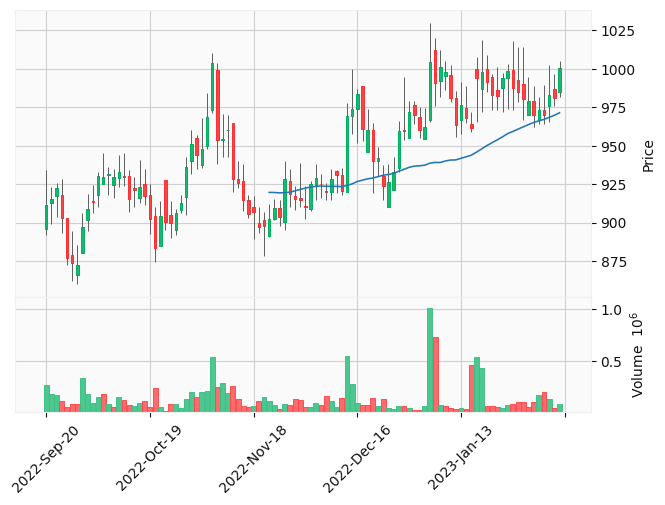

In [ ]:
df = downloaded[421][400:]
mpf.plot(df, type='candle',mav=(44), style='yahoo', volume=True)

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
from prophet import Prophet

In [ ]:
df_zero = downloaded[0]

In [ ]:
df_zero.reset_index(inplace=True)
data=df_zero[["Date","Adj Close"]]

In [ ]:
data=data.rename(columns={"Date": "ds", "Adj Close": "y"})

In [ ]:
data

,ds,y
0,2020-09-10,18726.099609
1,2020-09-11,18569.000000
2,2020-09-14,18922.500000
3,2020-09-15,18891.699219
4,2020-09-16,19231.500000
...,...,...
495,2022-09-08,22739.500000
496,2022-09-09,22839.949219
497,2022-09-12,22806.150391
498,2022-09-13,22802.150391


In [ ]:
l = len(data)
  


In [ ]:
df_train=data[0:int(l*.8)]
df_test=data[int(l*.8):]

In [ ]:
m = Prophet()
m.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq01_b2ow/f7_rfw4d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq01_b2ow/6nomis_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86163', 'data', 'file=/tmp/tmpq01_b2ow/f7_rfw4d.json', 'init=/tmp/tmpq01_b2ow/6nomis_c.json', 'output', 'file=/tmp/tmpwk2cggu7/prophet_model-20220914193533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:35:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:35:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=len(df_test))

In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
495,2022-07-26,15503.411293,13442.413908,17646.068441
496,2022-07-27,15363.450074,13447.750793,17354.735644
497,2022-07-28,15294.238075,13215.268399,17228.763934
498,2022-07-29,15176.380946,13061.765642,17231.568484
499,2022-07-30,15498.467620,13471.415726,17560.427198


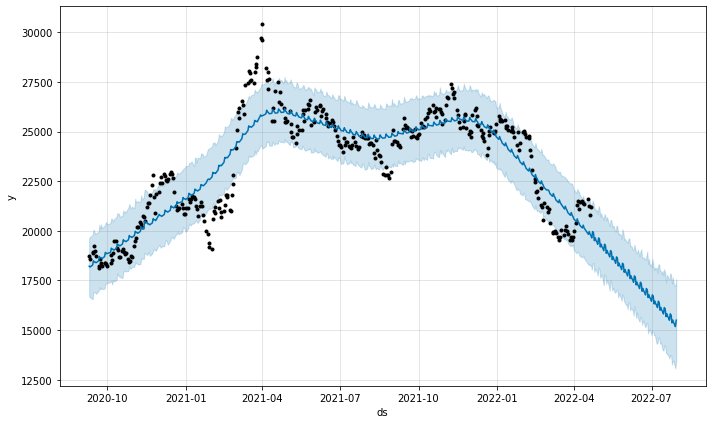

In [ ]:
fig1 = m.plot(forecast)

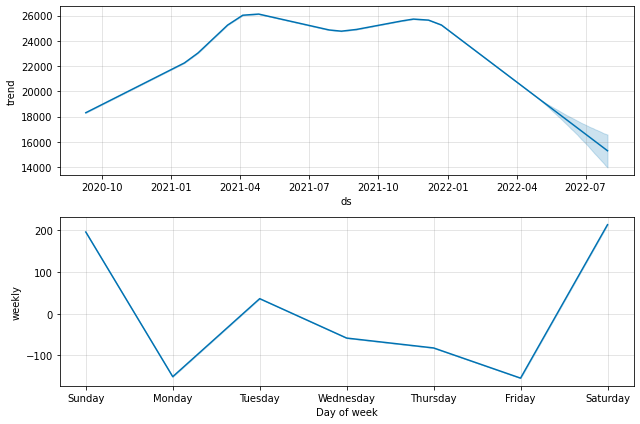

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [ ]:
df1=df_zero.drop(['Open',	'High',	'Low',	'Close','Volume'], axis=1)

In [ ]:
df1.head()

,Date,Adj Close
0,2020-09-10,18726.099609
1,2020-09-11,18569.000000
2,2020-09-14,18922.500000
3,2020-09-15,18891.699219
4,2020-09-16,19231.500000


In [ ]:
df_l = len(df1)

In [ ]:
df_l

500

In [ ]:
train = df1[:-int(.2*df_l)] ### 
print(len(train))
test = df1[-int(.2*df_l):]
print(len(test))

400
100


In [ ]:
# Prepare the training Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Adj Close'].values.reshape(-1,1))

prediction_days = 5

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])


x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build The Model
model = Sequential()
model.add(LSTM(units = 109, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(units =102, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =103, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next value

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
  


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 109)            48396     
                                                                 
 dropout (Dropout)           (None, 5, 109)            0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 102)            86496     
                                                                 
 dropout_1 (Dropout)         (None, 5, 102)            0         
                                                                 
 lstm_2 (LSTM)               (None, 103)               84872     
                                                                 
 dropout_2 (Dropout)         (None, 103)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

Epoch 1/12
6/6 [==============================] - 5s 129ms/step - loss: 0.2286 - val_loss: 0.0190
Epoch 2/12
6/6 [==============================] - 0s 20ms/step - loss: 0.1444 - val_loss: 0.0039
Epoch 3/12
6/6 [==============================] - 0s 20ms/step - loss: 0.0377 - val_loss: 0.1096
Epoch 4/12
6/6 [==============================] - 0s 17ms/step - loss: 0.0437 - val_loss: 0.0396
Epoch 5/12
6/6 [==============================] - 0s 17ms/step - loss: 0.0259 - val_loss: 0.0148
Epoch 6/12
6/6 [==============================] - 0s 19ms/step - loss: 0.0270 - val_loss: 0.0227
Epoch 7/12
6/6 [==============================] - 0s 19ms/step - loss: 0.0181 - val_loss: 0.0361
Epoch 8/12
6/6 [==============================] - 0s 20ms/step - loss: 0.0147 - val_loss: 0.0199
Epoch 9/12
6/6 [==============================] - 0s 19ms/step - loss: 0.0123 - val_loss: 0.0095
Epoch 10/12
6/6 [==============================] - 0s 19ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 11/12
6/6 [===========

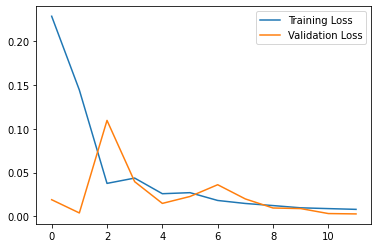

In [ ]:
history = model.fit(x_train, y_train, epochs = 12, batch_size=64, validation_split=0.1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Test Pre - Data Prep
actual_temp = test['Adj Close'].values
total_temp = pd.concat((train['Adj Close'], test['Adj Close']),axis=0)
model_inputs = total_temp[len(total_temp)-len(test)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs) ## scaler.transform

In [ ]:
# Make Predictions on Test Data
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred

array([[0.26262686],
       [0.25808313],
       [0.2392501 ],
       [0.22355668],
       [0.21564463],
       [0.1904228 ],
       [0.18043241],
       [0.17647442],
       [0.17472161],
       [0.1714585 ],
       [0.16396083],
       [0.15325771],
       [0.14138593],
       [0.13567889],
       [0.13546708],
       [0.13602015],
       [0.13152486],
       [0.12999211],
       [0.13109635],
       [0.13123178],
       [0.13212201],
       [0.1363294 ],
       [0.13435902],
       [0.13112414],
       [0.1310651 ],
       [0.13096756],
       [0.13091499],
       [0.13067263],
       [0.12943412],
       [0.13778524],
       [0.18991482],
       [0.22726208],
       [0.25461173],
       [0.25266474],
       [0.24313843],
       [0.23133582],
       [0.23075612],
       [0.2141205 ],
       [0.20397048],
       [0.19351818],
       [0.18448283],
       [0.17600423],
       [0.17655344],
       [0.16606762],
       [0.16343996],
       [0.16814798],
       [0.17915952],
       [0.188

In [ ]:
# https://www1.nseindia.com/content/indices/ind_nifty50list.csv
# https://www1.nseindia.com/content/indices/ind_niftyitlist.csv